Para este trabalho foi utilizado o dataset iris do kaggle, foi utilizado uma transformacao de dados para converter as 3 classes em apenas 2: setosa e outras, para testes foi utilizado 30% dos dados os outros 70% foram utilizados para treino, o modelo foi utilizado uma regressão logistica, a partir dos dados reais e dos dados preditos foram calculados os verdadeiros positivos (TP), verdadeiros negativos (TN), falsos positivos (FP) e falsos negativos (FN), a partir destes foram calculados os scores de sensibilidade, especificidade, acuracia, precisao e f-score.

Aqui baixamos o dataset do kaggle para a maquina local

In [230]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arshid/iris-flower-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/aecher/.cache/kagglehub/datasets/arshid/iris-flower-dataset/versions/1


Aqui lemos o csv e transformamos ele para um dataframe do pandas

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/home/aecher/.cache/kagglehub/datasets/arshid/iris-flower-dataset/versions/1/IRIS.csv')

Nosso classificador irá classificar se é do tipo 'iris-setosa' ou não, para isso iremos transformar tudo o que não está categorizado como 'iris-setosa' para 'iris-outra'

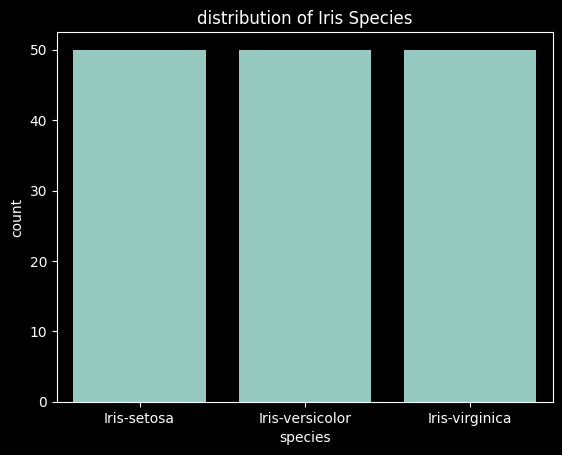

In [232]:
sns.countplot(x='species', data=df)
plt.title('distribution of Iris Species')
plt.show()

In [233]:
df['species']=df['species'].apply(lambda x:'Iris-setosa' if (x == 'Iris-setosa') else 'Iris-outra')

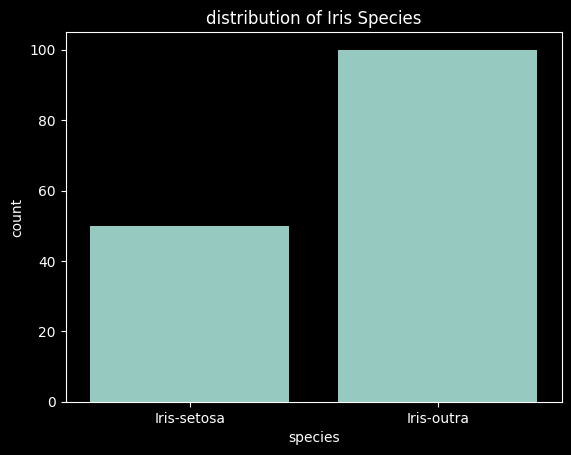

In [234]:
sns.countplot(x='species', data=df)
plt.title('distribution of Iris Species')
plt.show()

Aqui removemos a coluna y do dataset original e passamos para a variavel y

In [235]:
x=df.drop('species', axis=1)
y=df['species']

Aqui treinamos um modelo de regressão logistica separando 30% dos dados para teste

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model=LogisticRegression(max_iter=100)
model.fit(x_train,y_train)
print("")

Aqui imprimimos a matriz de confusão com o valor predito x o valor real

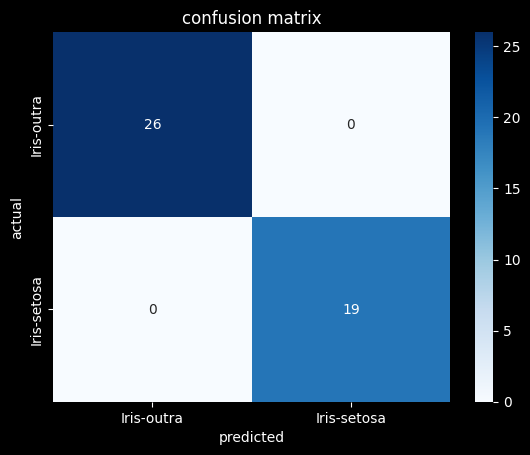

In [237]:
from sklearn.metrics import confusion_matrix

y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=model.classes_,yticklabels=model.classes_)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

Aqui calculamos as métricas manualmente: acurácia, sensibilidade, especificidade, precisão, f-score

In [238]:
TP = 0
FP = 0
TN = 0
FN = 0
for idx, x in enumerate(y_test.values):
    y_real_value = x
    y_pred_value = y_pred[idx]
    if y_real_value == 'Iris-setosa':
        if y_pred_value == 'Iris-setosa':
            TP += 1
        else:
            FP += 1
    else:
        if y_pred_value == 'Iris-setosa':
            FN += 1
        else:
            TN += 1

sensibilidade = TP / (TP + FN)
especifidade = TN / (FP + TN)
acuracia = (TP + TN) / (TP + TN + FP + FN)
precisao = TP / (TP + FP)
fscore = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

print("Sensibilidade: ", sensibilidade)
print("Especifidade: ", especifidade)
print("Acurácia: ", acuracia)
print("Precisao: ", precisao)
print("Fscore: ", fscore)

Sensibilidade:  1.0
Especifidade:  1.0
Acurácia:  1.0
Precisao:  1.0
Fscore:  1.0
